 # Probabilidade de Compras por Segmento
- Segmento: Restaurante 2 Estrelas

In [7]:
#Importes:
import pandas as pd

In [8]:
#Abrindo o DataFrame
dataFrame = pd.read_csv("/workspace/tensorFlow/udemyMLDS/dados/Restaurante_2_Estrelas.csv", sep=";")
dataFrame.head(10)

,DiasSemCompras,SemanaDoMes,QtdUltimaCompra,CompraRealizada
0,-139,3,13,SIM
1,-49,4,1,SIM
2,-47,4,0,NÃO
3,-46,4,0,NÃO
4,-42,3,0,NÃO
5,-42,4,3,SIM
6,-40,2,0,NÃO
7,-40,4,7,SIM
8,-39,3,0,NÃO
9,-39,4,0,NÃO


- O data frame disponibiliza os atributos Previsores e os atributos Classificadores. O mesmo será utilizado para treinar o modelo.

In [9]:
#Obter atributos Previsores e de classificação:
atributosPrevisores = dataFrame.iloc[:, 0:3].values
atributosClasses = dataFrame.iloc[:, 3].values

In [10]:
#Dividir dataFrame de Treino e Testes:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classes_treinamento, classes_teste = train_test_split(
    atributosPrevisores, 
    atributosClasses, 
    test_size=0.40, 
    random_state=0
)
print('Qtd. Registros de Treino:', len(previsores_treinamento))
print(previsores_treinamento[:10, :])
print('Qtd. Registros de Testes:', len(previsores_teste))
print(previsores_teste[:10, :])


Qtd. Registros de Treino: 83
[[-46   4   0]
 [-22   1   5]
 [ -7   1   2]
 [-20   2   3]
 [-40   2   0]
 [ -7   4   2]
 [ -3   4   8]
 [ -6   1   5]
 [-16   3   0]
 [-37   4   7]]
Qtd. Registros de Testes: 56
[[-39   3   0]
 [-13   3   1]
 [ -5   2   1]
 [ -8   3   6]
 [-30   3   5]
 [-10   2   0]
 [-20   1   2]
 [-11   1   7]
 [ -7   3   3]
 [ -5   3   5]]


In [11]:
#Criar o Treinnamento utilizando o método Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classificador = GaussianNB()

In [12]:
#Realizar o treinamento sobre os exemplos já classificados de treinamento:
classificador.fit(previsores_treinamento, classes_treinamento)
print('Estatísticas do Treinamento:')
print('Classes:', classificador.classes_)
print('Classes Count:', classificador.class_count_)
print('Classes Probabilidades:', classificador.class_prior_)

Estatísticas do Treinamento:
Classes: ['NÃO' 'SIM']
Classes Count: [21. 62.]
Classes Probabilidades: [0.25301205 0.74698795]


In [13]:
#Obter as previsões analisando os atributos Previsores do DataFrame separado para testes;
previsores = classificador.predict(previsores_teste)
for index, classePredict in  enumerate(previsores[:10]):
    print('Previsto: ', classePredict, 'Esperado: ', classes_teste[index], previsores_teste[index])

Previsto:  NÃO Esperado:  NÃO [-39   3   0]
Previsto:  SIM Esperado:  SIM [-13   3   1]
Previsto:  SIM Esperado:  SIM [-5  2  1]
Previsto:  SIM Esperado:  SIM [-8  3  6]
Previsto:  SIM Esperado:  SIM [-30   3   5]
Previsto:  NÃO Esperado:  NÃO [-10   2   0]
Previsto:  SIM Esperado:  SIM [-20   1   2]
Previsto:  SIM Esperado:  SIM [-11   1   7]
Previsto:  SIM Esperado:  SIM [-7  3  3]
Previsto:  SIM Esperado:  SIM [-5  3  5]


In [14]:
#Realizar previsão passando alguns exemplos:
predict = classificador.predict([
    [-20,3,0], #NÃO
    [-20,4,6], #SIM
    [-19,1,0], #NÃO
    [-25,2,8], #SIM
    [-25,3,0], #NÃO
    [-35,2,0]  #SIM
]) 
print(predict)

['NÃO' 'SIM' 'NÃO' 'SIM' 'NÃO' 'NÃO']


In [15]:
#Imporntar funcionalidades para avaliar o treinamento:
from sklearn.metrics import confusion_matrix, accuracy_score

In [16]:
#Obter a precisão comparando a previsão sobre a DataFrame de Testes:
precisao = accuracy_score(classes_teste, previsores)
print('Precisão de :', precisao)

Precisão de : 0.9464285714285714


In [17]:
#Obter a matriz confusão para visualizar a quantidade Positivos, Falso Positivo, Negativo e Falso Negativos:
matrizConfusao = confusion_matrix(classes_teste, previsores)
print('True  Positives:({matrizConfusao[0][0]}) False Negatives: ({matrizConfusao[0][1]})'.format(matrizConfusao=matrizConfusao))
print('False Positives:({matrizConfusao[1][0]}) True  Negatives: ({matrizConfusao[1][1]})'.format(matrizConfusao=matrizConfusao))

True  Positives:(16) False Negatives: (0)
False Positives:(3) True  Negatives: (37)


## Aplicando o método Arvore de Decisão

In [18]:
#Criar o classificador DecisionTree:
from sklearn.tree import DecisionTreeClassifier, export
classificadorDT = DecisionTreeClassifier(criterion='entropy')

In [19]:
#Excutar o treinamento sobre o DataFrame de treinamento utilizado no método Naive-bayes:
classificadorDT.fit(previsores_treinamento, classes_treinamento)
print(classificadorDT.feature_importances_)

[0.14474149 0.         0.85525851]


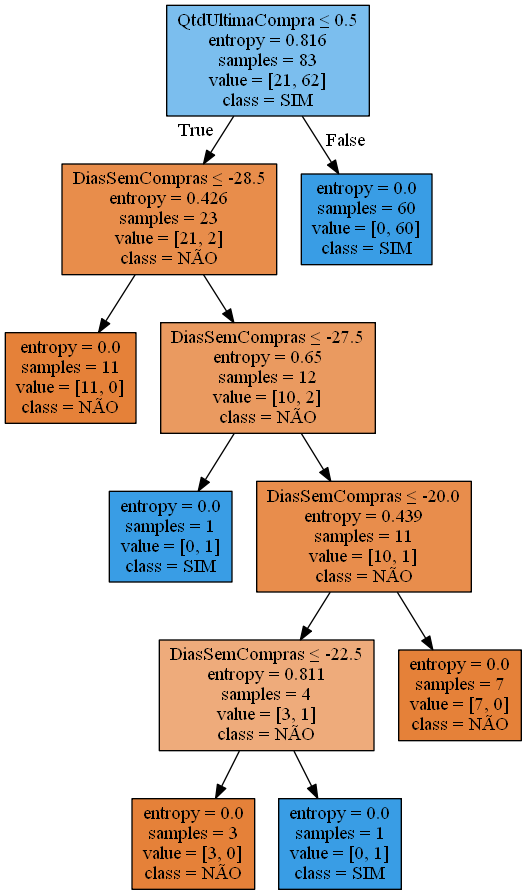

In [35]:
export.export_graphviz(
    classificadorDT, 
    out_file='DecisionTree.dot',
    feature_names=['DiasSemCompras', 'SemanaDoMes', 'QtdUltimaCompra'],
    class_names=['NÃO', 'SIM'],
    filled=True,
    leaves_parallel=False,
    special_characters=True
)
import os
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from IPython.display import Image
pydot_graph = pydotplus.graph_from_dot_file("DecisionTree.dot")
Image(pydot_graph.create_png())

In [32]:
#Obter as previsões da Arvore de Desisão analisando os atributos Previsores do DataFrame separado para testes;
previsoresDT = classificador.predict(previsores_teste)
for index, classePredict in  enumerate(previsoresDT[:10]):
    print('Previsto: ', classePredict, 'Esperado: ', classes_teste[index], previsores_teste[index])

#Obter a precisão comparando a previsão sobre a DataFrame de Testes:
precisaoDT = accuracy_score(classes_teste, previsoresDT)
print('Precisão Arvore de Decisão de :', precisaoDT)

Previsto:  NÃO Esperado:  NÃO [-39   3   0]
Previsto:  SIM Esperado:  SIM [-13   3   1]
Previsto:  SIM Esperado:  SIM [-5  2  1]
Previsto:  SIM Esperado:  SIM [-8  3  6]
Previsto:  SIM Esperado:  SIM [-30   3   5]
Previsto:  NÃO Esperado:  NÃO [-10   2   0]
Previsto:  SIM Esperado:  SIM [-20   1   2]
Previsto:  SIM Esperado:  SIM [-11   1   7]
Previsto:  SIM Esperado:  SIM [-7  3  3]
Previsto:  SIM Esperado:  SIM [-5  3  5]
Precisão Arvore de Decisão de : 0.9464285714285714


In [36]:
#Obter a matriz confusão Arvore de Decisão para visualizar a quantidade Positivos, Falso Positivo, Negativo e Falso Negativos:
matrizConfusaoDT = confusion_matrix(classes_teste, previsoresDT)
print('True  Positives:({matrizConfusao[0][0]}) False Negatives: ({matrizConfusao[0][1]})'.format(matrizConfusao=matrizConfusaoDT))
print('False Positives:({matrizConfusao[1][0]}) True  Negatives: ({matrizConfusao[1][1]})'.format(matrizConfusao=matrizConfusaoDT))

True  Positives:(16) False Negatives: (0)
False Positives:(3) True  Negatives: (37)
